<a href="https://colab.research.google.com/github/C3st0/CryptoCurrenciesSocialMedia/blob/master/NeuralNetworksSentimentAnalysis/ColabTweetsSentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolution Neural Network analysis of Tweets 

#1 Script inital steps / libraries loading

In [0]:
import sys

In [2]:
!pip install kaggle

In [0]:
!mkdir .kaggle

In [0]:
import json
token = {"username":"datacesto","key":"fb05445ad1a13be38cfd5ba865b335c4"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [0]:
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json

In [7]:
!kaggle config set -n path -v{/content}

- path is now set to: {/content}


In [0]:
!chmod 600 /root/.kaggle/kaggle.json

In [9]:
!kaggle datasets download -d skularat/bitcoin-tweets -p /content

  0% 0.00/3.46M [00:00<?, ?B/s]
100% 3.46M/3.46M [00:00<00:00, 114MB/s]


In [10]:
!unzip \*.zip

Archive:  bitcoin-tweets.zip
  inflating: bitcointweets.csv       


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [0]:
import warnings
warnings.filterwarnings("ignore")

In [13]:
# Load Data
df = pd.read_csv('bitcointweets.csv', header=None)
pd.set_option('display.max_colwidth', -1)
df = df[[1,7]]
df.columns = ['tweet','label']
df.head()

,tweet,label
0,"RT @ALXTOKEN: Paul Krugman, Nobel Luddite. I had to tweak the nose of this Bitcoin enemy. He says such foolish things. Here's the link: htt…",['neutral']
1,@lopp @_Kevin_Pham @psycho_sage @naval But @ProfFaustus (dum b a ss) said you know nothing about #Bitcoin ... 😂😂😂 https://t.co/SBAMFQ2Yiy,['neutral']
2,RT @tippereconomy: Another use case for #blockchain and #Tipper. The #TipperEconomy can unseat Facebook and change everything! ICO Live No…,['positive']
3,free coins https://t.co/DiuoePJdap,['positive']
4,RT @payvxofficial: WE are happy to announce that PayVX Presale Phase 1 is now LIVE!\n\nSign up --&gt;&gt; https://t.co/dhprzsSxek\nCurrencies accept…,['positive']


In [14]:
df.tail()

,tweet,label
50854,RT @fixy_app: Fixy Network brings popular cryptocurrencies and retailers as partners with benefits from blockchain. Partner Stores will acc…,['positive']
50855,"RT @bethereumteam: After a successful launch of our Bounty campaign, we've managed to filter out the Bounty related questions to: https://t…",['positive']
50856,"RT @GymRewards: Buy #GYMRewards Tokens, Bonus Time is ending! https://t.co/HDvhoZrz2J, #ICO #cryptocurrency #mobile #app #mining #exercisin…",['neutral']
50857,I added a video to a @YouTube playlist https://t.co/ntFJrNvSvZ How To Bitcoin Cloud Mining Free For Lifetime Urdu / Hindi,['positive']
50858,RT @Raybambs: Airdrop PhotoCoin Airdrop Round#2. 100 #PhotoCoin will be giving to everyone who complete the google form. Your account will…,['positive']


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50859 entries, 0 to 50858
Data columns (total 2 columns):
tweet    50859 non-null object
label    50859 non-null object
dtypes: object(2)
memory usage: 794.8+ KB


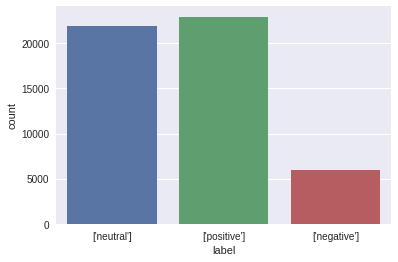

In [16]:
# inspect sentiment
sns.countplot(df['label'])

In [17]:
# text length
df['text_length'] = df['tweet'].apply(len)
df[['label','text_length','tweet']].head()

,label,text_length,tweet
0,['neutral'],140,"RT @ALXTOKEN: Paul Krugman, Nobel Luddite. I had to tweak the nose of this Bitcoin enemy. He says such foolish things. Here's the link: htt…"
1,['neutral'],137,@lopp @_Kevin_Pham @psycho_sage @naval But @ProfFaustus (dum b a ss) said you know nothing about #Bitcoin ... 😂😂😂 https://t.co/SBAMFQ2Yiy
2,['positive'],140,RT @tippereconomy: Another use case for #blockchain and #Tipper. The #TipperEconomy can unseat Facebook and change everything! ICO Live No…
3,['positive'],34,free coins https://t.co/DiuoePJdap
4,['positive'],146,RT @payvxofficial: WE are happy to announce that PayVX Presale Phase 1 is now LIVE!\n\nSign up --&gt;&gt; https://t.co/dhprzsSxek\nCurrencies accept…


In [18]:
df['text_length'].describe()

count    50859.000000
mean     127.650072  
std      23.595770   
min      7.000000    
25%      126.000000  
50%      140.000000  
75%      140.000000  
max      166.000000  
Name: text_length, dtype: float64

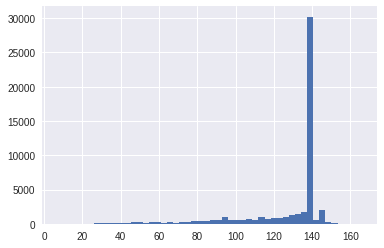

In [19]:
df['text_length'].hist(bins=50)

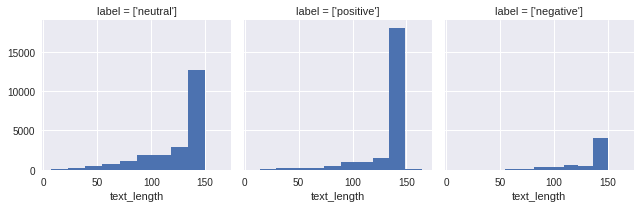

In [20]:
g = sns.FacetGrid(df,col='label')
g.map(plt.hist,'text_length')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


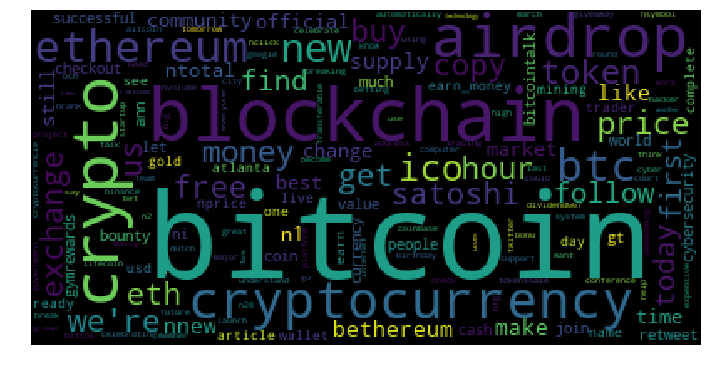

In [21]:
# word cloud
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from wordcloud import WordCloud
import re

def clean_text(s):
    s = re.sub(r'http\S+', '', s)
    s = re.sub('(RT|via)((?:\\b\\W*@\\w+)+)', ' ', s)
    s = re.sub(r'@\S+', '', s)
    s = re.sub('&amp', ' ', s)
    return s
df['clean_tweet'] = df['tweet'].apply(clean_text)

text = df['clean_tweet'].to_string().lower()    
wordcloud = WordCloud(
    collocations=False,
    relative_scaling=0.5,
    stopwords=set(stopwords.words('english'))).generate(text)

plt.figure(figsize=(12,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [0]:
seed = 101 # fix random seed for reproducibility
np.random.seed(seed)

In [23]:
print(type(df))
df["tweet"].describe()

<class 'pandas.core.frame.DataFrame'>


count     50859                                                                                                                                       
unique    28136                                                                                                                                       
top       RT @GymRewards: https://t.co/Bm9sIxiiwU  Checkout our #bitcointalk #ANN https://t.co/J5xnJJr7Sa … #Gymrewards #tokenssale #ethereum #bitcoi…
freq      672                                                                                                                                         
Name: tweet, dtype: object

In [24]:
df.tweet.head()

0    RT @ALXTOKEN: Paul Krugman, Nobel Luddite. I had to tweak the nose of this Bitcoin enemy. He says such foolish things. Here's the link: htt…         
1    @lopp @_Kevin_Pham @psycho_sage @naval But @ProfFaustus (dum b a ss) said you know nothing about #Bitcoin ... 😂😂😂 https://t.co/SBAMFQ2Yiy            
2    RT @tippereconomy: Another use case for #blockchain and #Tipper. The #TipperEconomy  can unseat Facebook and change everything! ICO Live No…         
3    free coins https://t.co/DiuoePJdap                                                                                                                   
4    RT @payvxofficial: WE are happy to announce that PayVX Presale Phase 1 is now LIVE!\n\nSign up --&gt;&gt; https://t.co/dhprzsSxek\nCurrencies accept…
Name: tweet, dtype: object

In [25]:
df.label.head()

0    ['neutral'] 
1    ['neutral'] 
2    ['positive']
3    ['positive']
4    ['positive']
Name: label, dtype: object

In [26]:
# Split Train Test sets
import tensorflow
from sklearn.model_selection import train_test_split
X = df["tweet"]
y = df["label"]

# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(y)
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
y = onehot_encoder.fit_transform(integer_encoded)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=seed)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(40687,) (10172,) (40687, 3) (10172, 3)


In [27]:
# Tokenize Text
from keras.preprocessing.text import Tokenizer
max_features = 20000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(X_train))
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

Using TensorFlow backend.


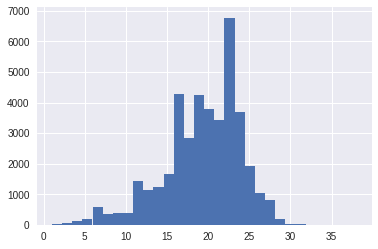

In [28]:
totalNumWords = [len(one_comment) for one_comment in X_train]
plt.hist(totalNumWords,bins = 30)
plt.show()

In [29]:
from keras.preprocessing import sequence
max_words = 30
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)
print(X_train.shape,X_test.shape)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(X_train.shape[1])

(40687, 30) (10172, 30)
(40687, 30) (10172, 30) (40687, 3) (10172, 3)
30


In [0]:
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense,Embedding,Conv1D,MaxPooling1D,LSTM
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

batch_size = 128
epochs = 5

In [0]:
def get_model(max_features, embed_dim):
    np.random.seed(seed)
    K.clear_session()
    model = Sequential()
    model.add(Embedding(max_features, embed_dim, input_length=X_train.shape[1]))
    model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=2))    
    model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    print(model.summary())
    return model


In [0]:
def model_train(model):
    # train the model
    model_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                          epochs=epochs, batch_size=batch_size, verbose=2)
    # plot train history
    plot_model_history(model_history)

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def model_evaluate(): 
    # predict class with test set
    y_pred_test =  model.predict_classes(X_test, batch_size=batch_size, verbose=0)
    print('Accuracy:\t{:0.1f}%'.format(accuracy_score(np.argmax(y_test,axis=1),y_pred_test)*100))
    
    #classification report
    print('\n')
    print(classification_report(np.argmax(y_test,axis=1), y_pred_test))

    #confusion matrix
    confmat = confusion_matrix(np.argmax(y_test,axis=1), y_pred_test)

    fig, ax = plt.subplots(figsize=(4, 4))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.tight_layout()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 30, 100)           2000000   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 30, 32)            9632      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 15, 32)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 15, 32)            3104      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 7, 32)             0         
_________________________________________________________________
lstm_1 (LSTM)        

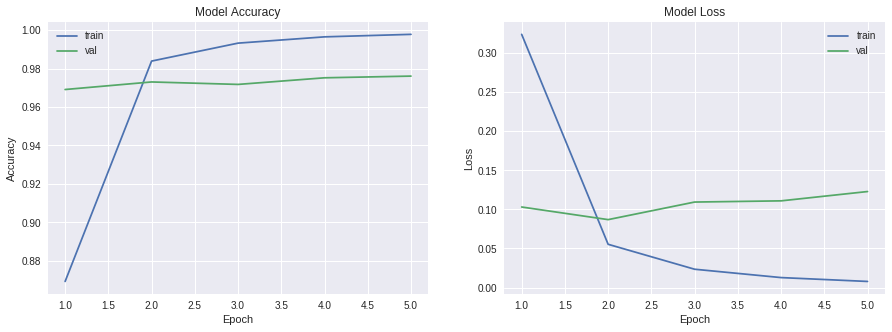

In [35]:
# train the model
max_features = 20000
num_classes = 3
embed_dim = 100
model = get_model(max_features, embed_dim)
model_train(model)

Accuracy:	97.6%


              precision    recall  f1-score   support

           0       0.96      0.93      0.94      1197
           1       0.97      0.98      0.98      4388
           2       0.98      0.98      0.98      4587

   micro avg       0.98      0.98      0.98     10172
   macro avg       0.97      0.96      0.97     10172
weighted avg       0.98      0.98      0.98     10172



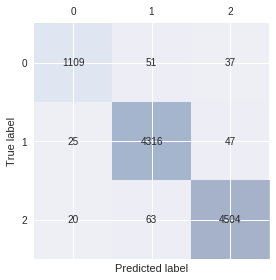

In [36]:
# evaluate model with test set
model_evaluate()

In [0]:
y_pred_test =  model.predict_classes(X_test, batch_size=batch_size, verbose=0)

In [38]:
!kaggle datasets download -d datacesto/bitcointweetssprinkler -p /content

  0% 0.00/294k [00:00<?, ?B/s]
100% 294k/294k [00:00<00:00, 42.9MB/s]


In [39]:
!unzip \*.zip

Archive:  bitcointweetssprinkler.zip
  inflating: BitcoinTweetsFiltered.csv  

Archive:  bitcoin-tweets.zip
replace bitcointweets.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: bitcointweets.csv       

2 archives were successfully processed.


In [40]:
#Load new tweets to be predicted
df = pd.read_csv('BitcoinTweetsFiltered.csv', encoding='utf-16')
df.head()

,Unnamed: 0,Created_at,Text,Lang
0,0,Mon Oct 01 06:29:17 +0000 2018,"Australian government develops decentralized blockchain that records 40,000 tx/second, can the country see rapid cr… https://t.co/Or5FqkmCW1",en
1,2,Mon Oct 01 06:30:10 +0000 2018,https://t.co/Esl6lG8SMS 💯 Does Website Speed Affect Seo?\r\n#RankBio #Insights #Moz #GoogleRank #WebPage… https://t.co/mBmGQwG1Ri,en
2,4,Mon Oct 01 06:31:14 +0000 2018,"RT @YourootNews: Early 2018, TreeBlock's Founder participated a private event of the tech research community about the future technologies…",en
3,5,Mon Oct 01 06:31:16 +0000 2018,Binance gives free money through airdrops! Join today\r\n\r\nClick here: https://t.co/rMTJwRkvcw \r\n\r\n$BTC $ETH $OMG $LSK… https://t.co/uQrpZyCclK,en
4,6,Mon Oct 01 06:31:18 +0000 2018,RT @ServAdvisor: Another good review of ServAdvisor project: \r\nhttps://t.co/ZAiJoOyzs0\r\n\r\n#cryptonews #cryptocurrency #blockchain #ICO #Crypto…,en


In [0]:
X_new = df["Text"]  
#Turn tweets into vectors
X_new = tokenizer.texts_to_sequences(X_new)
X_new = sequence.pad_sequences(X_new, maxlen=max_words)

In [0]:
y_pred_label =  model.predict_classes(X_new, batch_size=batch_size, verbose=0)

In [0]:
df['label'] = y_pred_label

In [76]:
df.loc[df["label"] == 2].head(10)

,Unnamed: 0,Created_at,Text,Lang,label
3,5,Mon Oct 01 06:31:16 +0000 2018,Binance gives free money through airdrops! Join today\r\n\r\nClick here: https://t.co/rMTJwRkvcw \r\n\r\n$BTC $ETH $OMG $LSK… https://t.co/uQrpZyCclK,en,2
4,6,Mon Oct 01 06:31:18 +0000 2018,RT @ServAdvisor: Another good review of ServAdvisor project: \r\nhttps://t.co/ZAiJoOyzs0\r\n\r\n#cryptonews #cryptocurrency #blockchain #ICO #Crypto…,en,2
5,7,Mon Oct 01 06:31:19 +0000 2018,Why does everything has its own unique and custom config format!?\r\n\r\nEvery time one needs to figure out if: it's case… https://t.co/dWOMSd8wNx,en,2
9,12,Mon Oct 01 06:32:18 +0000 2018,"Regina SK Weather, Temp:0.6ºC; Dew:-5.8ºC; Pressure:1023.30hPa.; Wind:2/kph@97.0; Humdity:62… https://t.co/otRPbIJ6vl",en,2
14,19,Mon Oct 01 06:34:43 +0000 2018,RT @elyqdcom: Train your mind to see the good in every situation.\r\n\r\nhttps://t.co/g5hzl8KxjR #ico #tokensale #crowdsale #fundraising #token…,en,2
19,27,Mon Oct 01 06:36:50 +0000 2018,"RT @reddcoin: #ReddHeads, today is actually the day! #ReddID #Social Tipping Extension #MVP v0.99 is out (https://t.co/u0aZtx1WIq) for the…",en,2
20,31,Mon Oct 01 06:38:52 +0000 2018,best project,en,2
21,32,Mon Oct 01 06:39:09 +0000 2018,RT @ConnectyCTY: Connecty is the first #blockchain platform dedicated entirely to the #knowledge economy. \r\nOur ambition? Foster the #innova…,en,2
24,37,Mon Oct 01 06:41:57 +0000 2018,RT @oxley_token: I will choose 1 random followers to win 10000 OXLEY \r\nPlease :\r\n\r\n1. FOLLOW\r\n2. LIKE AND RETWEET \r\n3. Comment your ETH address…,en,2
25,38,Mon Oct 01 06:42:14 +0000 2018,RT @ConnectyCTY: Connecty is the first #blockchain platform dedicated entirely to the #knowledge economy. \r\nOur ambition? Foster the #innova…,en,2


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3686 entries, 0 to 3685
Data columns (total 5 columns):
Unnamed: 0    3686 non-null int64
Created_at    3686 non-null object
Text          3686 non-null object
Lang          3686 non-null object
label         3686 non-null int64
dtypes: int64(2), object(3)
memory usage: 144.1+ KB


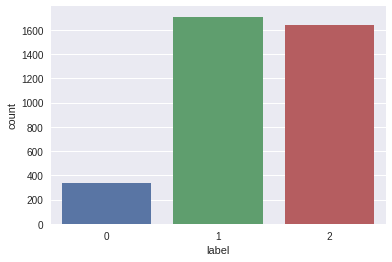

In [60]:
# inspect sentiment
sns.countplot(df['label'])

In [0]:
df.to_csv("NewTweetsLabelled.csv", encoding='utf-16')

In [77]:
!kaggle datasets download -d datacesto/twitterbitcoins2019 -p /content

  0% 0.00/1.49M [00:00<?, ?B/s]
100% 1.49M/1.49M [00:00<00:00, 49.0MB/s]


In [78]:
!unzip \twitterbitcoins2019.zip

Archive:  twitterbitcoins2019.zip
replace TwitterData_Processed.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: TwitterData_Processed.csv  


In [81]:
#Load new tweets to be predicted
df = pd.read_csv('TwitterData_Processed.csv', sep=",", encoding="utf-8",names = ["Sequence", "user", "Timestamp", "Text"],)
df.head()

,Sequence,user,Timestamp,Text
0,1,;EmpireSell,Thu Mar 14 20:59:24 +0000 2019,sell full access og unstack ghoul bitcoin paypal fampf payment sell bc pc ban account
1,2,;BitWearz,Thu Mar 14 20:59:25 +0000 2019,bitchcoin fck she good call back everi time btc bitcoin cryptocurr
2,3,;BlockWatcher,Thu Mar 14 20:59:26 +0000 2019,thu mar fourteen time two thousand nineteen time usd three thousand eight hundr eighti four thirti nine one hundredth wght zero nineteen one hundredth blk five hundr sixti seven thousand eighti size one hundr sixti one nine tenth kb tx four hundr seventi three pool two hundr forti zero mb zero bitcoin
3,4,;Nanyna221,Thu Mar 14 20:59:26 +0000 2019,thank support dap anoth masternod worth dap giveaway start testnet start plea
4,5,;CyclopsWK,Thu Mar 14 20:59:27 +0000 2019,yet btc


In [0]:
df["Text"]=df["Text"].astype(str)

In [0]:
X_new = df["Text"]  
#Turn tweets into vectors
X_new = tokenizer.texts_to_sequences(X_new)
X_new = sequence.pad_sequences(X_new, maxlen=max_words)


# Nouvelle section

In [0]:
y_pred_label =  model.predict_classes(X_new, batch_size=batch_size, verbose=0)

In [0]:
df['label'] = y_pred_label

In [97]:
df.head(20)

,Sequence,user,Timestamp,Text,label
0,1,;EmpireSell,Thu Mar 14 20:59:24 +0000 2019,sell full access og unstack ghoul bitcoin paypal fampf payment sell bc pc ban account,2
1,2,;BitWearz,Thu Mar 14 20:59:25 +0000 2019,bitchcoin fck she good call back everi time btc bitcoin cryptocurr,2
2,3,;BlockWatcher,Thu Mar 14 20:59:26 +0000 2019,thu mar fourteen time two thousand nineteen time usd three thousand eight hundr eighti four thirti nine one hundredth wght zero nineteen one hundredth blk five hundr sixti seven thousand eighti size one hundr sixti one nine tenth kb tx four hundr seventi three pool two hundr forti zero mb zero bitcoin,1
3,4,;Nanyna221,Thu Mar 14 20:59:26 +0000 2019,thank support dap anoth masternod worth dap giveaway start testnet start plea,2
4,5,;CyclopsWK,Thu Mar 14 20:59:27 +0000 2019,yet btc,1
5,6,;jobsinai1,Thu Mar 14 20:59:29 +0000 2019,senior lead java develop agil greenfield cv librari info,1
6,7,;CryptoPressNews,Thu Mar 14 20:59:29 +0000 2019,btc btc bitcoin current price three thousand nine hundr twenti one dollar thirti one cent h zero four one hundredth h zero thirti three one hundredth,1
7,8,;ruigomeseu,Thu Mar 14 20:59:33 +0000 2019,sell buy bitcoin,1
8,9,;Anwarkaja1Anwar,Thu Mar 14 20:59:34 +0000 2019,renew energi magazin post u energi blockchain,1
9,10,;cryptodeal2,Thu Mar 14 20:59:33 +0000 2019,digiid formula like retweet guy digiid secur,1


In [98]:
df.loc[df["label"] == 0].head(10)

,Sequence,user,Timestamp,Text,label
23,24,;Rastafasta3,Thu Mar 14 20:59:47 +0000 2019,amp cheap hoe shill scam tokenpay fail pumpanddump fugazi btc,0
27,28,;CalebWright802,Thu Mar 14 20:59:49 +0000 2019,ibm launch crossbord payment portal base stellar coinbas pro add support xlm,0
52,53,;coinstats,Thu Mar 14 21:00:01 +0000 2019,bitcoin btc price ten dollar forti five cent chang oneh market cap sixti eight dollar nineti three cent rank one bitcoin btc,0
75,76,;VillamizarITPro,Thu Mar 14 21:00:02 +0000 2019,tweet electroneum price note minor gain phone creat posit buzz,0
133,134,;CryptoGirl_News,Thu Mar 14 21:00:07 +0000 2019,rememb one day bitcoin scorn worthless alreadi know go chanc,0
159,160,;cryptonext,Thu Mar 14 21:00:15 +0000 2019,long short nikkei use bitcoin go long short nki,0
272,273,;guicabeyo,Thu Mar 14 21:01:05 +0000 2019,keep stream btc,0
287,288,;Coinbullishish,Thu Mar 14 21:01:11 +0000 2019,peopl hold bitcoin ugli dude ugli dude dont find girlfriend wont get child mean,0
299,300,;cryptomulml,Thu Mar 14 21:01:21 +0000 2019,binanc bitcoin black bcb binanc tandatangani petisi via,0
396,397,;Spicyfr,Thu Mar 14 21:02:29 +0000 2019,le mond pa pour le bitcoin pourquoi pressecitron,0
